In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
import time
IMAGES_FOLDER_PATH = "../images"

## Part 1

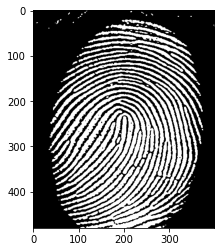

In [2]:
thumb = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'thumb_print.jpg'),0)
# plt.imshow(thumb,cmap='gray')
# plt.show()

ret,thumb = cv2.threshold(thumb,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thumb,cmap='gray')
plt.show()
thumb = np.int64(thumb/255)

In [3]:
def match_area_obs(img1,img2):
    h,w = img1.shape
    for i in range(h):
        for j in range(w):
            if img2[i,j] == -1:
                continue
            if img1[i,j] != img2[i,j]:
                return 0
    return 1

In [4]:
def morph(img,kernel):
    h,w = img.shape
    k_h,k_w = kernel.shape
    
    output = img.copy()
    
    padding_img = np.zeros([h+k_h-1,w+k_w-1])
    padding_img[int((k_h-1)/2):int(h+(k_h-1)/2),int((k_w-1)/2):int(w+(k_w-1)/2)] = img
    
    for i in range(int(k_h/2),h+int(k_h/2)):
        for j in range(int(k_w/2),w+int(k_w/2)):
            area_obs = padding_img[i-int(k_h/2):i+int(k_h/2)+1,j-int(k_w/2):j+int(k_w/2)+1]
            if match_area_obs(area_obs,kernel)==1:
                output[i-int(k_h/2),j-int(k_w/2)] = 0 
                
    return np.int64(output)

In [5]:
s1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]])
s2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])

In [6]:
img = thumb.copy()
prev = thumb.copy()
while True:
    for j in range(4):
        img = morph(img, s1)
        img = morph(img, s2)
        s1 = np.rot90(s1)
        s2 = np.rot90(s2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.01:
        break
#   print(delta)
    prev = img

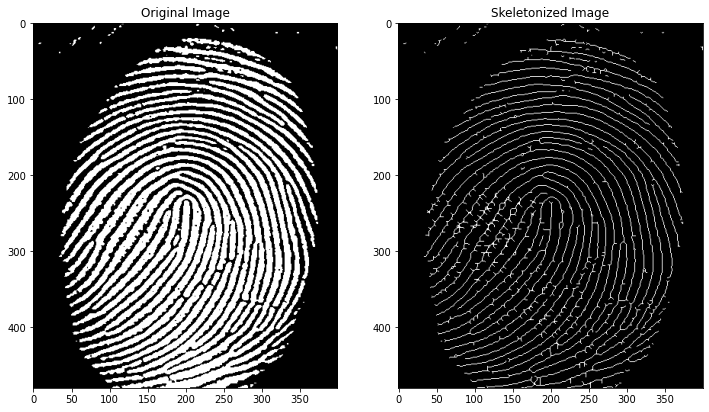

In [7]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(thumb,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Skeletonized Image')
plt.show()

## Part 2

#### The role of S1 is to detect curve edges and outliers
#### The role of S2 is to detect right angled corners

## Part 3

####  Rotating the structural elements are necessary to detect horizontal as well as vertical edges, curves
#### As number of passes increase, we get more finer looking skeleton of the image

## Part 4

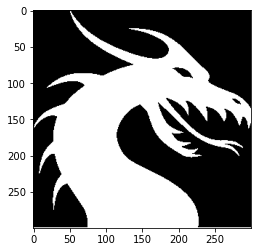

In [8]:
dragon = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'dragon.png'),0)
# plt.imshow(dragon,cmap='gray')
# plt.show()

ret,dragon = cv2.threshold(dragon,127,255,cv2.THRESH_BINARY)
plt.imshow(dragon,cmap='gray')
plt.show()
dragon = np.int64(dragon/255)

In [9]:
img = dragon.copy()
prev = dragon.copy()
while True:
    for j in range(4):
        img = morph(img, s1)
        img = morph(img, s2)
        s1 = np.rot90(s1)
        s2 = np.rot90(s2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.00001:
        break
#     print(delta)
    prev = img

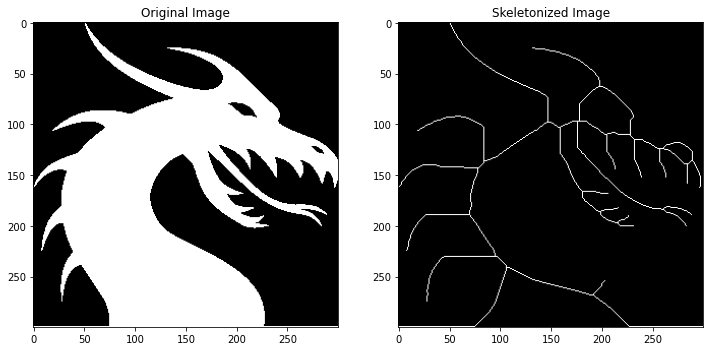

In [10]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(dragon,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Skeletonized Image')
plt.show()

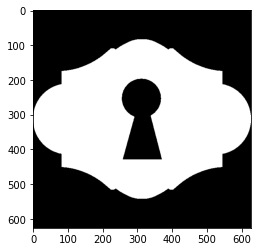

In [11]:
keyhole = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'keyhole.jpg'),0)
# plt.imshow(keyhole,cmap='gray')
# plt.show()

ret,keyhole = cv2.threshold(keyhole,127,255,cv2.THRESH_BINARY)
plt.imshow(keyhole,cmap='gray')
plt.show()
keyhole = np.int64(keyhole/255)

In [12]:
img = keyhole.copy()
prev = keyhole.copy()
while True:
    for j in range(4):
        img = morph(img, s1)
        img = morph(img, s2)
        s1 = np.rot90(s1)
        s2 = np.rot90(s2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.0001:
        break
#   print(delta)
    prev = img

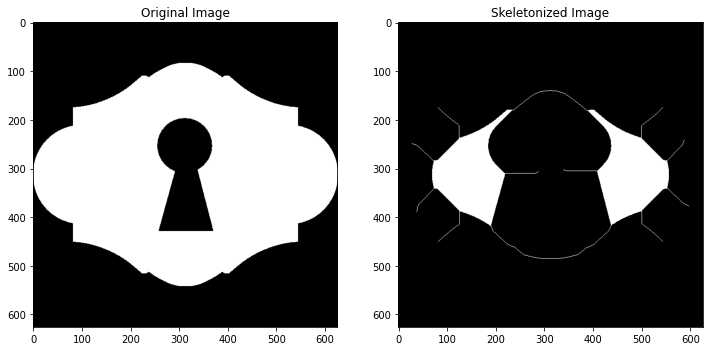

In [13]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(keyhole,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Skeletonized Image')
plt.show()

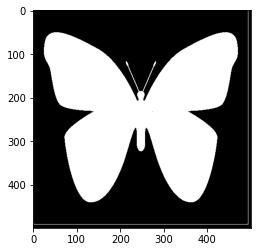

In [14]:
butterfly = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'butterfly.jpg'),0)
# plt.imshow(butterfly,cmap='gray')
# plt.show()

ret,butterfly = cv2.threshold(butterfly,127,255,cv2.THRESH_BINARY)
plt.imshow(butterfly,cmap='gray')
plt.show()
butterfly = np.int64(butterfly/255)

In [15]:
img = butterfly.copy()
prev = butterfly.copy()
while True:
    for j in range(4):
        img = morph(img, s1)
        img = morph(img, s2)
        s1 = np.rot90(s1)
        s2 = np.rot90(s2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.0001:
        break
#   print(delta)
    prev = img

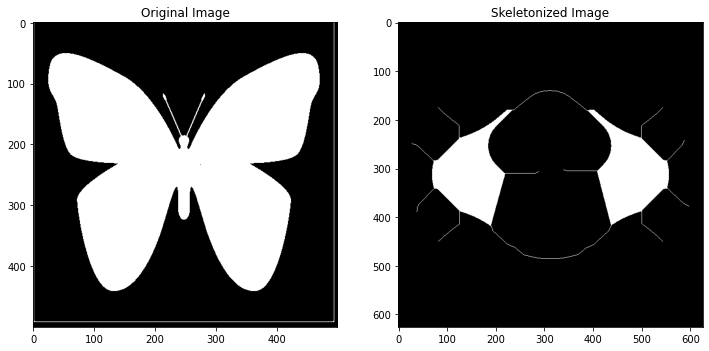

In [17]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(butterfly,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Skeletonized Image')
plt.show()

### Observations

#### All thick lines are reduced to a thin line. It is not possible to retrieve the original image from this skeleton
#### Holes in the image have grown larger.
#### There is branching towards parts which have more mass as compared to others and require much more passes to skeletonize